In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read data
df = pd.read_csv(r"C:\Users\Aishwarya\Desktop\ExcelR\Day 13 Linear Regression\Data Sets\NewspaperData.csv")
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [3]:
#Select relevant columns

In [3]:
df = df[['daily','sunday']]
df

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [4]:
#Data description
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [5]:
#Correlation analysis

<AxesSubplot:xlabel='daily', ylabel='Density'>

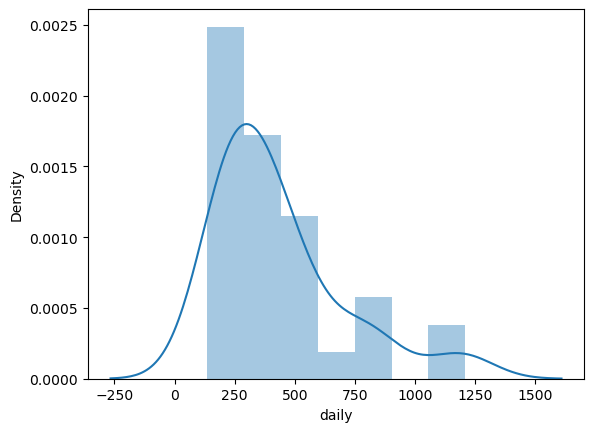

In [5]:
sns.distplot(df['daily'])

<AxesSubplot:xlabel='sunday', ylabel='Density'>

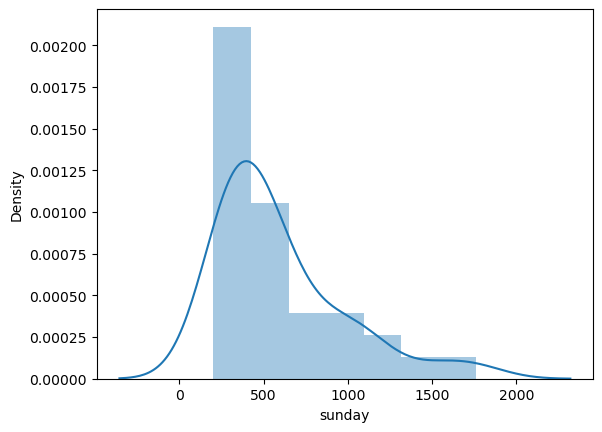

In [6]:
sns.distplot(df['sunday'])

In [7]:
df['sunday'].skew()

1.5644730738925112

In [8]:
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<AxesSubplot:>

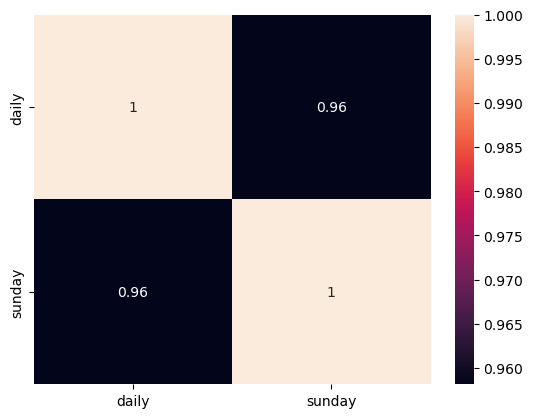

In [9]:
sns.heatmap(df.corr(), annot=True)

In [6]:
#Import statsmodels

In [10]:
import statsmodels.formula.api as smf

In [11]:
model = smf.ols('sunday~daily', data=df).fit()

In [7]:
#Model parameters

In [12]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [13]:
#line equation
x = 250

y =  1.339715*x+13.835630
y

348.76437999999996

In [14]:
#Print values for t value and p value
print(model.tvalues)
print(model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64
Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [15]:
#r2 value
model.rsquared

0.9180596895873294

# Prediction for new data

In [16]:
df.head(2)

,daily,sunday
0,391.952,488.506
1,516.981,798.298


In [17]:
newdf = pd.DataFrame({
    'daily' : [500,650,250,180,300]
})
newdf

,daily
0,500
1,650
2,250
3,180
4,300


In [18]:
model.predict(newdf)

0    683.693009
1    884.650222
2    348.764319
3    254.984286
4    415.750057
dtype: float64

# Data Transformation

In [24]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

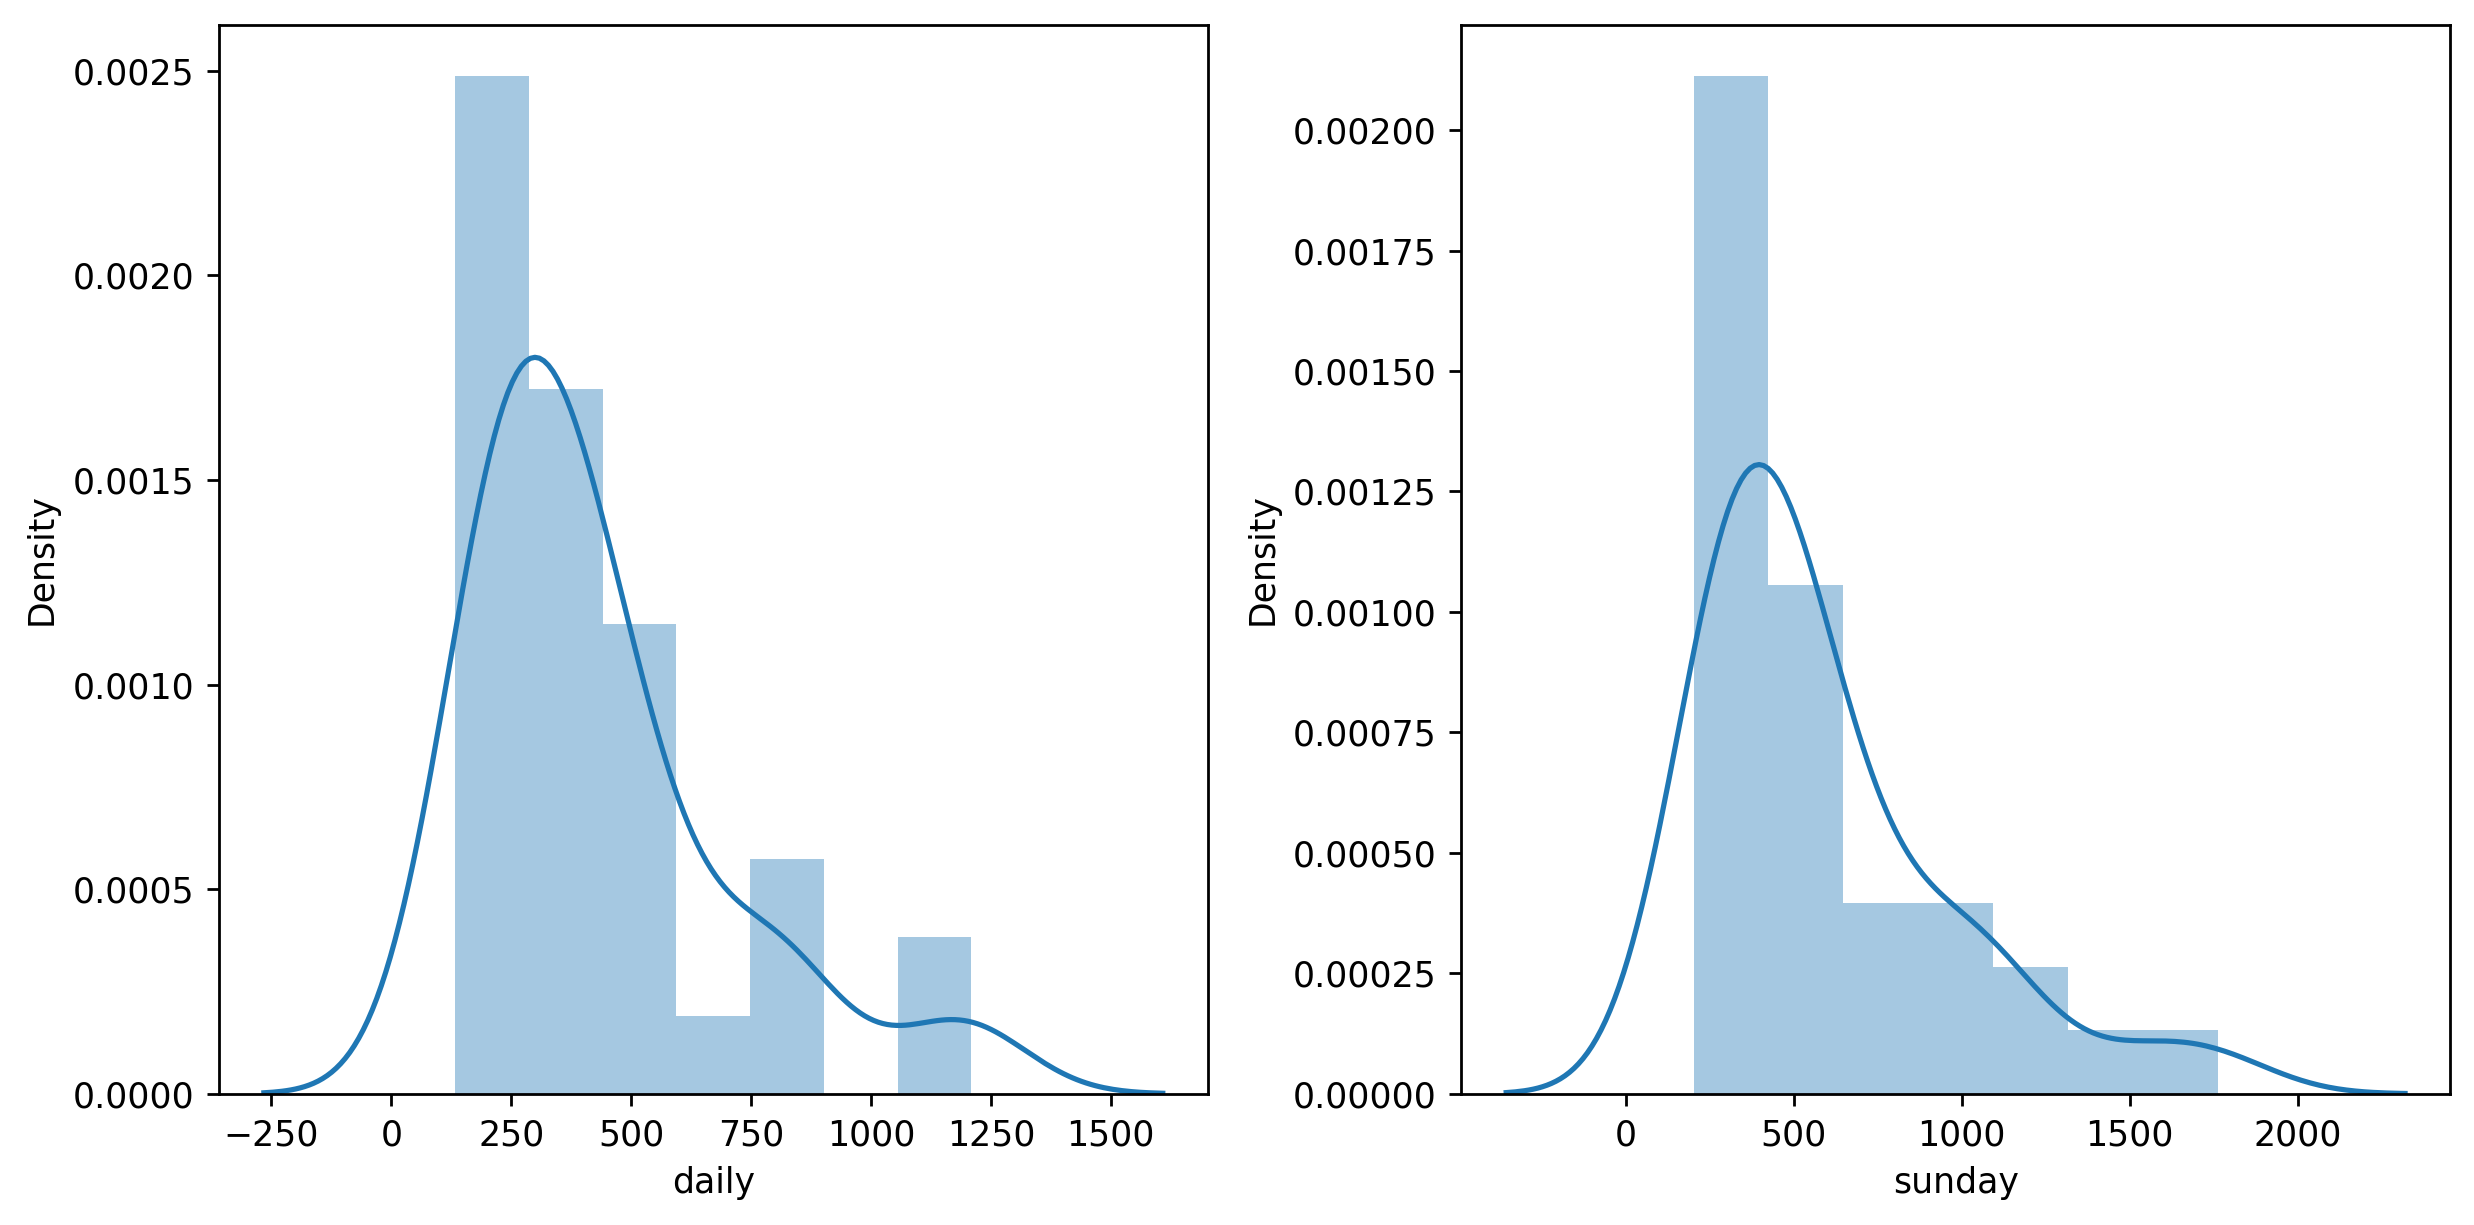

In [25]:
plt.subplot(1,2,1)
sns.distplot(df['daily'])

plt.subplot(1,2,2)
sns.distplot(df['sunday'])
plt.tight_layout()

# Log Transformation

In [22]:
df['log_daily'] = np.log(df['daily'])
df.head()

,daily,sunday,log_daily
0,391.952,488.506,5.971139
1,516.981,798.298,6.248006
2,355.628,235.084,5.873885
3,238.555,299.451,5.474600
4,537.780,559.093,6.287450


In [23]:
df['log_sunday'] = np.log(df['sunday'])
df.head()

,daily,sunday,log_daily,log_sunday
0,391.952,488.506,5.971139,6.191352
1,516.981,798.298,6.248006,6.682482
2,355.628,235.084,5.873885,5.459943
3,238.555,299.451,5.474600,5.701951
4,537.780,559.093,6.287450,6.326316


<AxesSubplot:xlabel='log_sunday', ylabel='Density'>

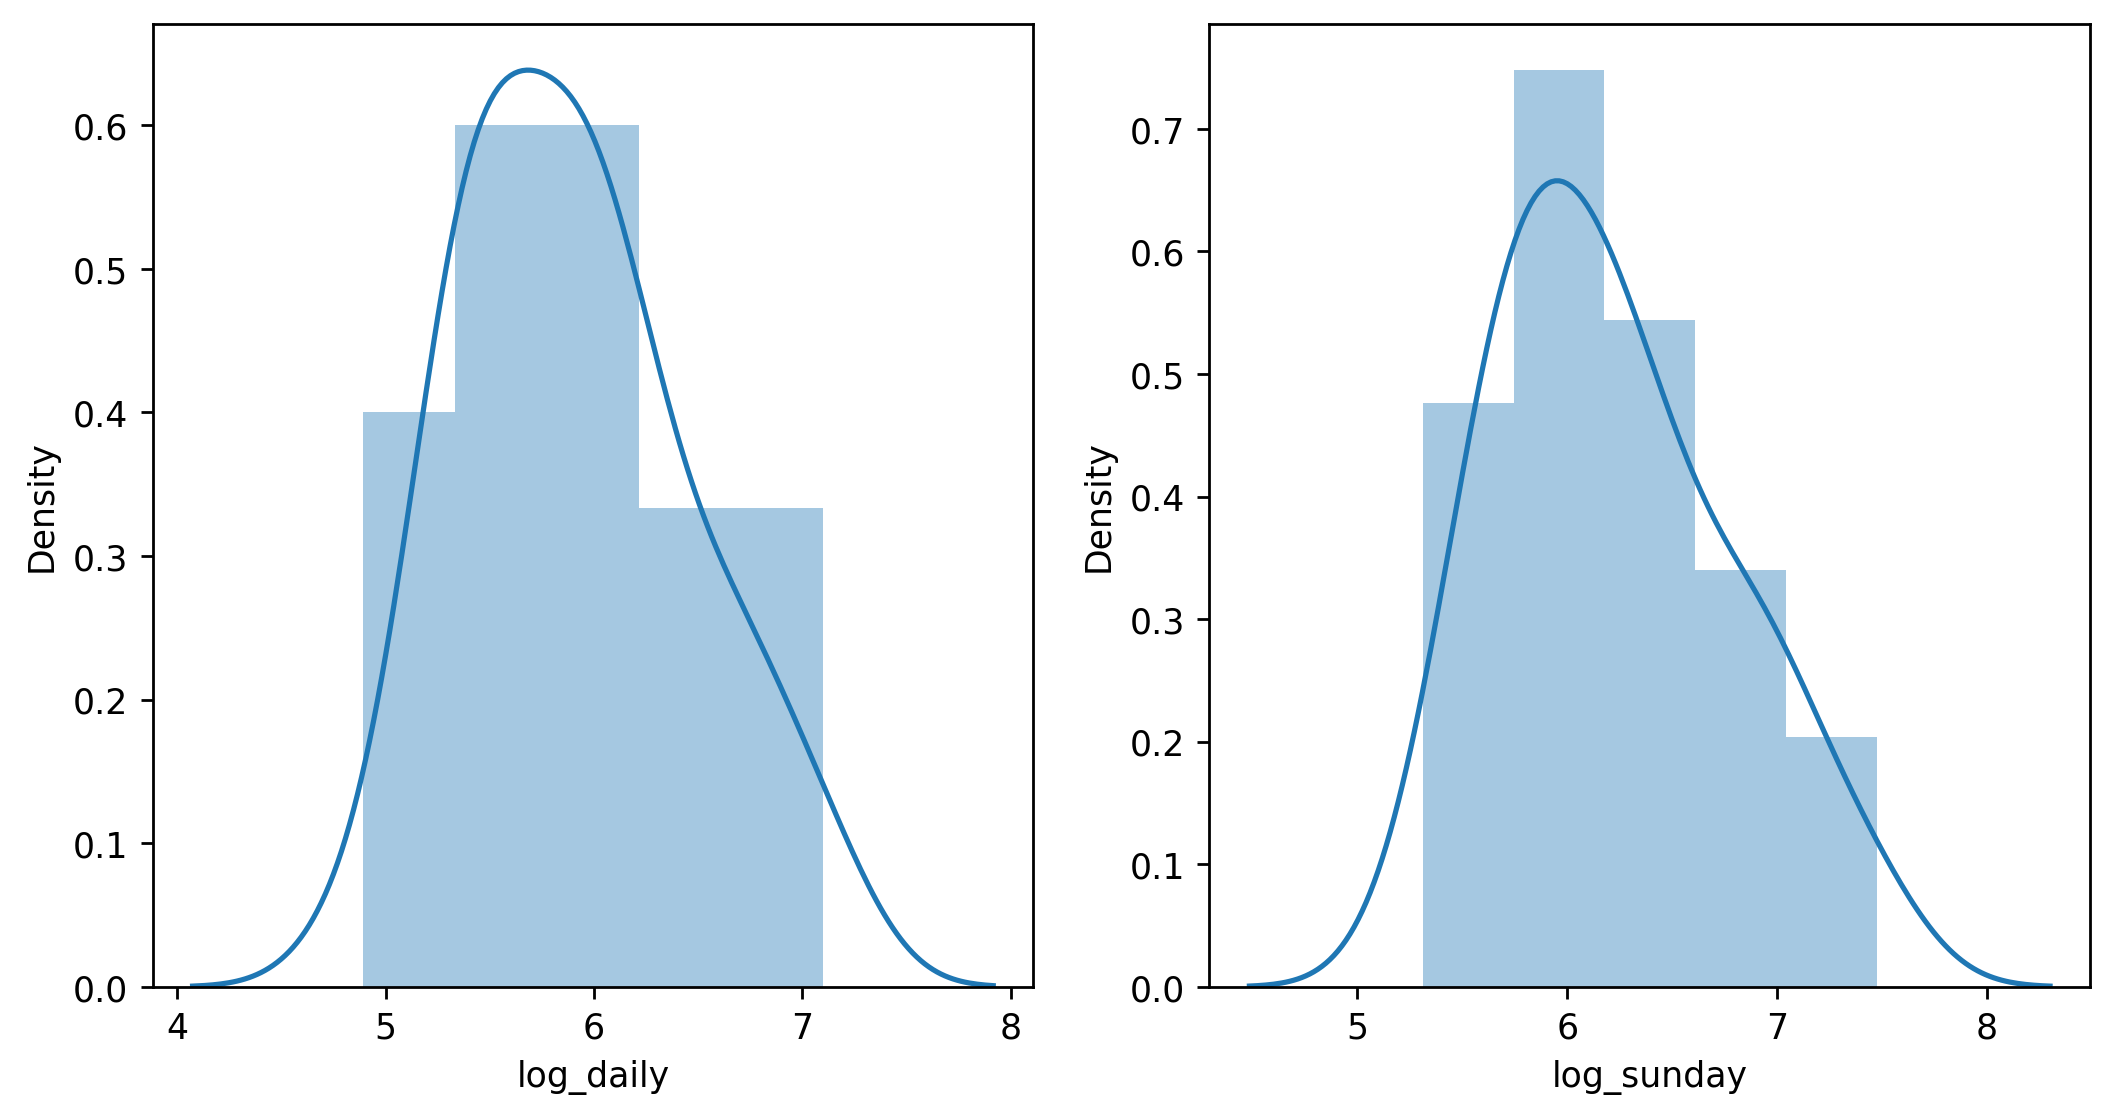

In [26]:
plt.subplot(1,2,1)
sns.distplot(df['log_daily'])

plt.subplot(1,2,2)
sns.distplot(df['log_sunday'])

In [27]:
df['log_daily'].skew()

0.4682202000020356

In [28]:
df['sqrt_sunday'] = np.sqrt(df['sunday'])
df.head()

,daily,sunday,log_daily,log_sunday,sqrt_sunday
0,391.952,488.506,5.971139,6.191352,22.102172
1,516.981,798.298,6.248006,6.682482,28.254168
2,355.628,235.084,5.873885,5.459943,15.332449
3,238.555,299.451,5.474600,5.701951,17.304653
4,537.780,559.093,6.287450,6.326316,23.645147


<AxesSubplot:xlabel='sqrt_sunday', ylabel='Density'>

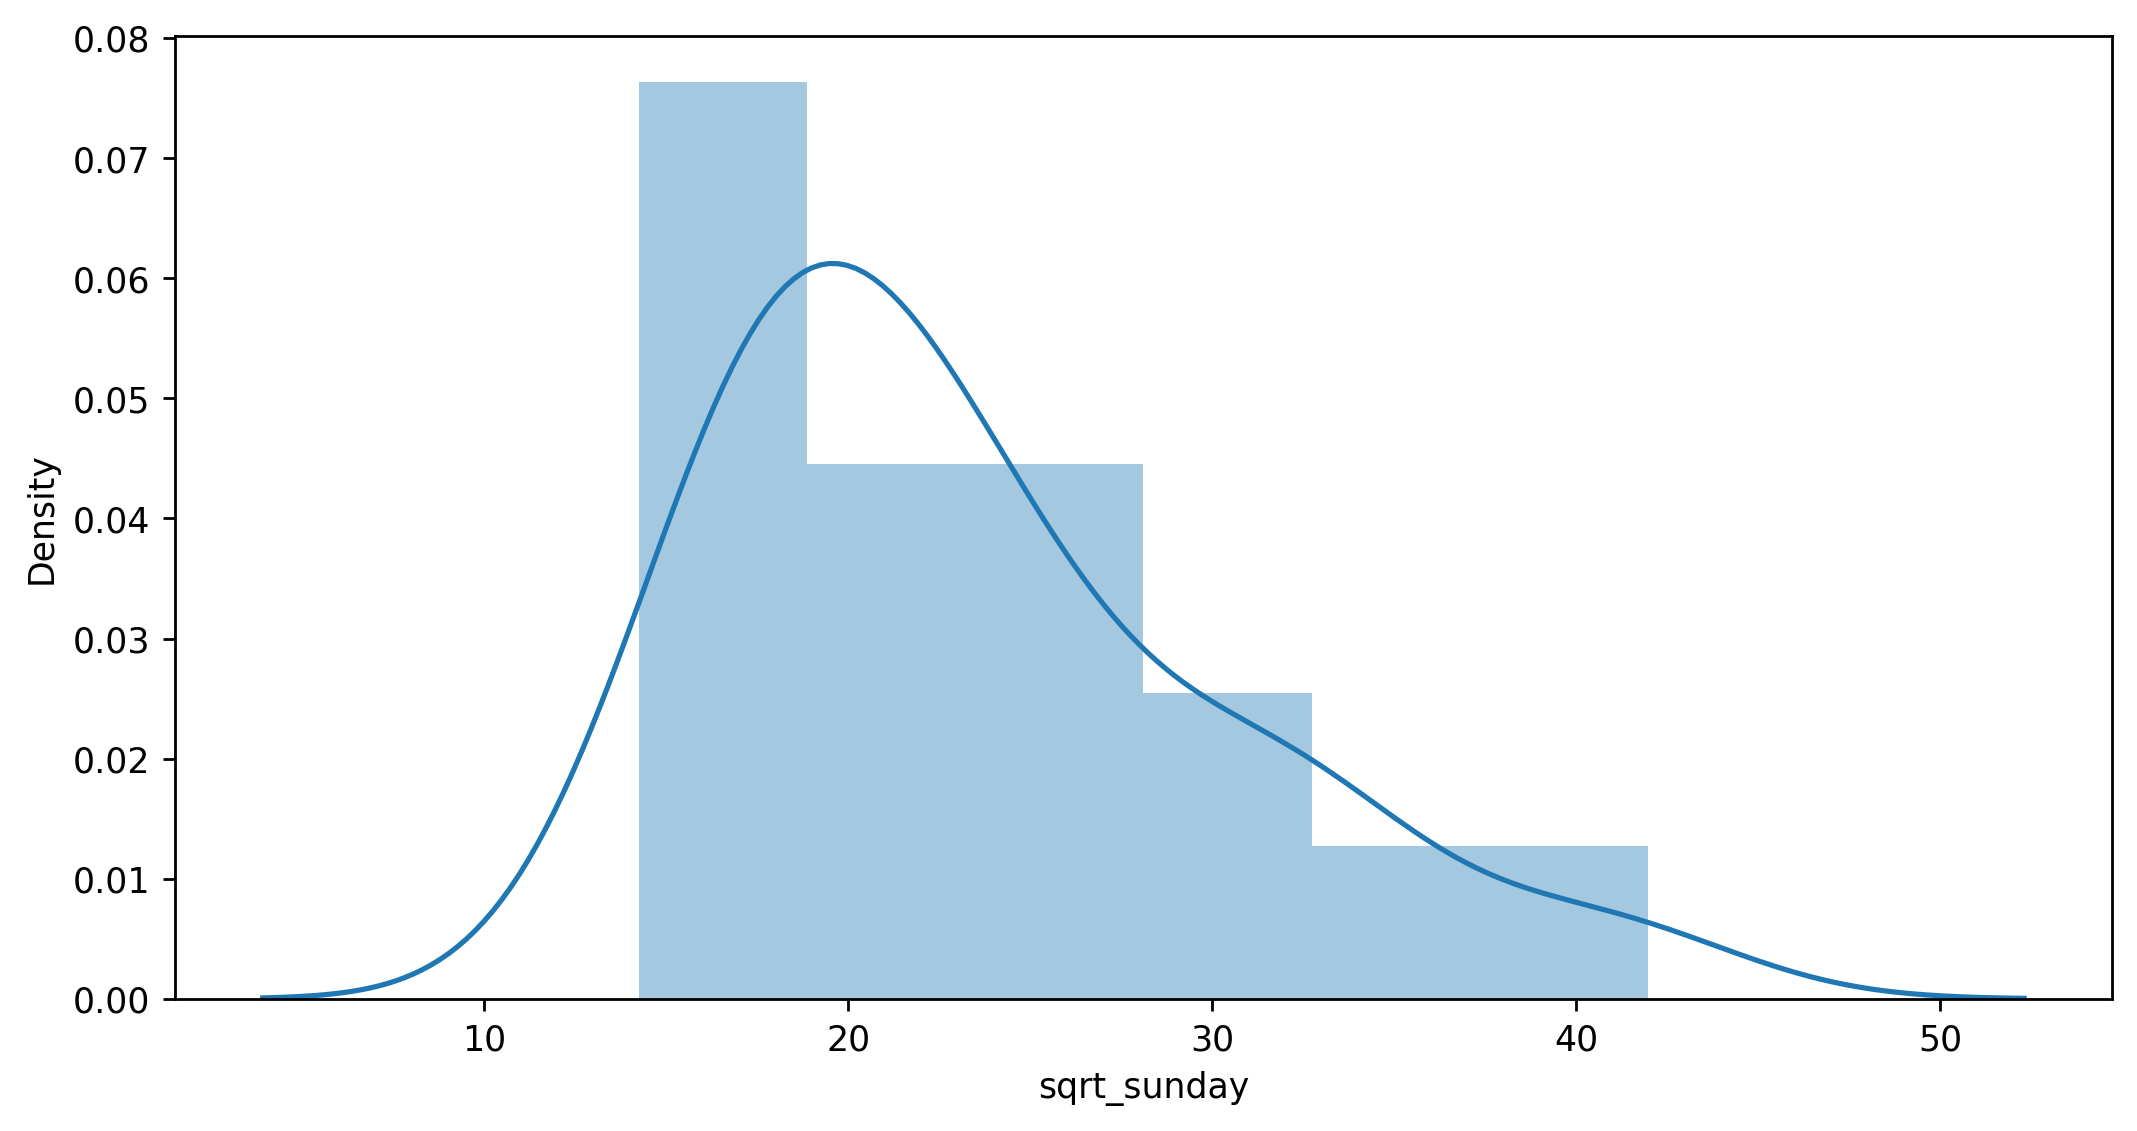

In [29]:
sns.distplot(df['sqrt_sunday'])

In [30]:
df['sqrt_sunday'].skew()

1.0392935145699538

# WC dataset

In [11]:
#import data
#Create/ fit the data in model
#Get the prediction

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/WC_AT.csv')
df

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [32]:
newdf = pd.DataFrame({
    'Waist' : [40,45,75,150,180]
})
newdf

,Waist
0,40
1,45
2,75
3,150
4,180


In [33]:
model = smf.ols('AT~Waist', data = df).fit()

model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [34]:
model.predict(newdf)

0    -77.627112
1    -60.332815
2     43.432966
3    302.847421
4    406.613203
dtype: float64

In [35]:
df['Waist'].min()

63.5

In [36]:
df['Waist'].max()

121.0